# Flight Price Prediction 

## Introduction

### Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here i will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### Flight_name: Name of flight
### Depart: The source from which the service begins.
### Departure_Time: The time when the journey starts from the source.
### Arrival_Time:Time of arrival at the destination.
### Duration:Total duration of the flight.
### Destination: The destination where the service ends.
### Total_stops: Total stops between the source and destination.
###  Price: The price of the ticket.

In [128]:
from IPython.display import Image
Image(url= "https://i1.wp.com/thetechhacker.com/wp-content/uploads/2014/10/Top-Best-Airfare-Price-Predictor-Sites-and-Apps-To-Your-Journey.jpg?w=1000&ssl=1")

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#n for models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [94]:
# I have import important libraries for this project in one go so that it will save time.

## Dataset

In [35]:
df = pd.read_excel('flight.xlsx')
df.head()

,Flight_name,Depart,Departure_Time,Destination,Arrival_Time,Duration,Total_stops,Price
0,Air Asia,New Delhi,04:25:00,Mumbai,06:35:00,2h 10m,Non Stop,2456
1,Go First,New Delhi,07:00:00,Mumbai,09:10:00,2h 10m,Non Stop,2456
2,IndiGo,New Delhi,07:15:00,Mumbai,09:25:00,2h 10m,Non Stop,2456
3,Go First,New Delhi,08:00:00,Mumbai,10:10:00,2h 10m,Non Stop,2456
4,IndiGo,New Delhi,08:10:00,Mumbai,10:20:00,2h 10m,Non Stop,2456


In [95]:
# From the dataset i can say that there are few columns in integer and few are in strings.
# All the columns have vital information so i will not be dropping any columns from the dataset except one column.

## EDA - Exploratory Data Analysis

In [36]:
df.shape

(1470, 8)

In [96]:
# There are 1470 rows and 8 columns in the dataset.

In [37]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flight_name     1470 non-null   object
 1   Depart          1470 non-null   object
 2   Departure_Time  1470 non-null   object
 3   Destination     1470 non-null   object
 4   Arrival_Time    1470 non-null   object
 5   Duration        1469 non-null   object
 6   Total_stops     1470 non-null   object
 7   Price           1470 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 92.0+ KB


In [97]:
# It is a mixed dataset as 6 columns are object type and 1 columns are integers type.

In [38]:
df.drop_duplicates(inplace = True)
df.shape

(1291, 8)

In [98]:
# There are few duplicates value in the datset.
# Now there are 1291 rows and 8 columns in the dataset.

In [39]:
df.nunique()

Flight_name         6
Depart              4
Departure_Time    220
Destination        10
Arrival_Time      225
Duration          302
Total_stops         9
Price             567
dtype: int64

In [ ]:
# There are few columns which are categorical in nature and few columns are continous in nature.

## Flight name

In [7]:
df["Flight_name"].value_counts()

IndiGo       341
Vistara      321
Air India    308
Go First     147
Air Asia      93
SpiceJet      81
Name: Flight_name, dtype: int64

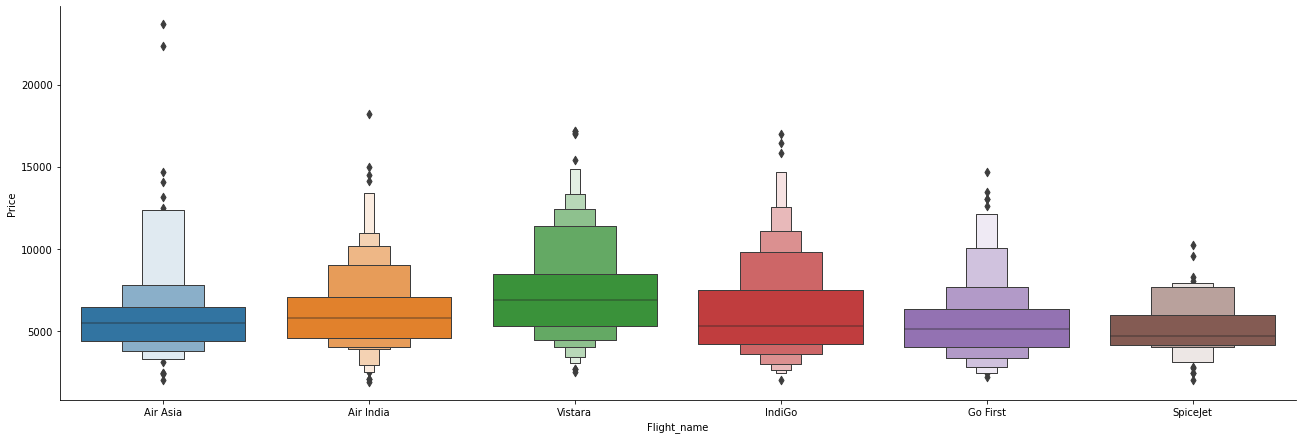

In [8]:
# Airline vs Price
sns.catplot(y = "Price", x = "Flight_name", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [99]:
# Vistara flight price is high as compared to other flight service.

## Departure

In [9]:
df["Depart"].value_counts()

New Delhi    429
Bangalore    406
Mumbai       309
Kolkata      147
Name: Depart, dtype: int64

<AxesSubplot:xlabel='Depart', ylabel='Price'>

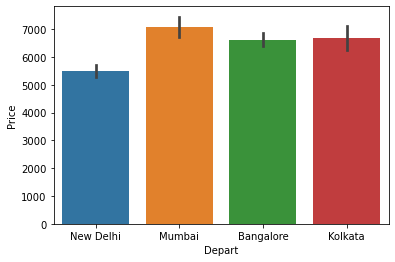

In [10]:
sns.barplot(df['Depart'],df['Price'])

In [100]:
# Flight price from mumbai is high as compared to other state.

## Destination

In [11]:
df["Destination"].value_counts()

Goa           250
Mumbai        171
New Delhi     147
Kolkata       121
Hyderabad     113
Varanasi      109
Guwahati      106
Chandigarh     95
Lucknow        94
Jaipur         85
Name: Destination, dtype: int64

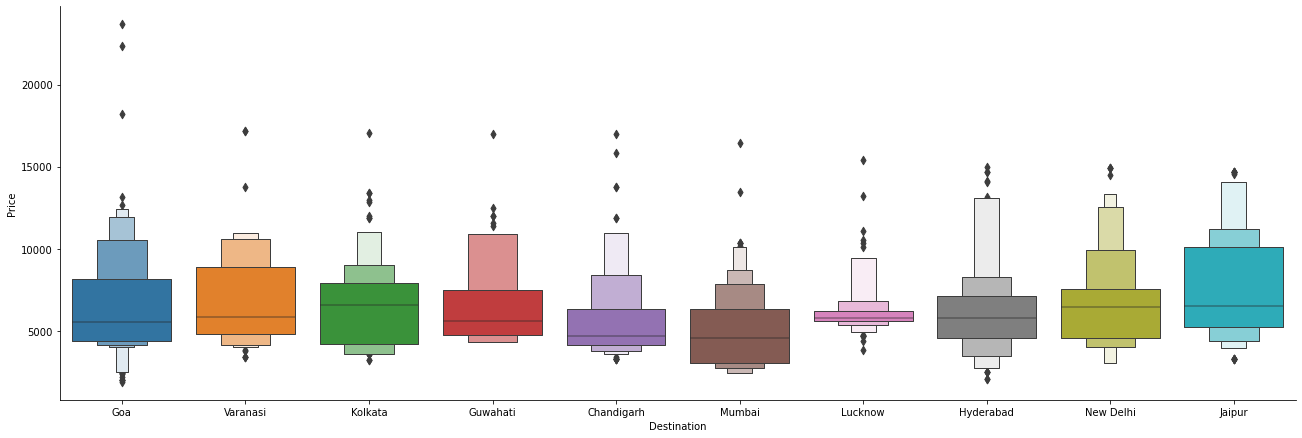

In [12]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [101]:
# Destination do affect the price of the flight.
# Jaipur, Goa and New Delhi flight price is high as compared to other state.

## Total stops

In [13]:
df["Total_stops"].value_counts()

1 Stop       906
Non Stop     194
2 Stop(s)    118
2 Stop        38
3 Stop(s)     28
4 Stop(s)      3
3 Stop         2
5 Stop         1
4 Stop         1
Name: Total_stops, dtype: int64

<AxesSubplot:xlabel='Total_stops', ylabel='Price'>

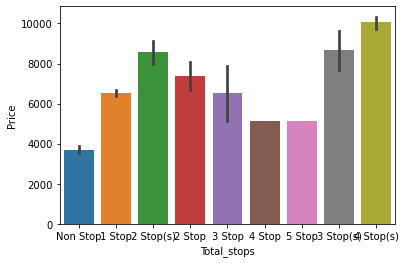

In [14]:
sns.barplot(df['Total_stops'],df['Price'])

In [102]:
# The flight that have no stop is cheapest among others.

## Label Encoder

In [41]:
le = LabelEncoder()
df.Flight_name = le.fit_transform(df.Flight_name)
df.Depart = le.fit_transform(df.Depart)
df.Departure_Time = le.fit_transform(df.Departure_Time)
df.Destination = le.fit_transform(df.Destination)
df.Arrival_Time = le.fit_transform(df.Arrival_Time)
df.Duration = le.fit_transform(df.Duration)
df.Total_stops = le.fit_transform(df.Total_stops)

In [103]:
# I have used label encoder to convert the strings values into intergers.
# It will help me in model building.

In [42]:
df.describe()

,Flight_name,Depart,Departure_Time,Destination,Arrival_Time,Duration,Total_stops,Price
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,2.752905,1.589466,106.068164,4.387297,122.204493,174.089853,1.529047,6364.553834
std,1.647685,1.239660,60.610665,2.950017,59.460586,96.571753,2.860539,2772.914216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1890.000000
25%,1.000000,0.000000,50.000000,1.000000,79.500000,82.500000,0.000000,4384.500000
50%,3.000000,2.000000,96.000000,4.000000,121.000000,205.000000,0.000000,5702.000000
75%,4.000000,3.000000,160.500000,7.000000,173.000000,261.000000,2.000000,7506.000000
max,5.000000,3.000000,219.000000,9.000000,224.000000,302.000000,8.000000,23672.000000


In [104]:
# Total number of counts in each columns is matching as there is no missing values.
# The difference between the mean and 50% is not much.
# There are outlires in the dataset which i will remove it soon.

## Distribution plot

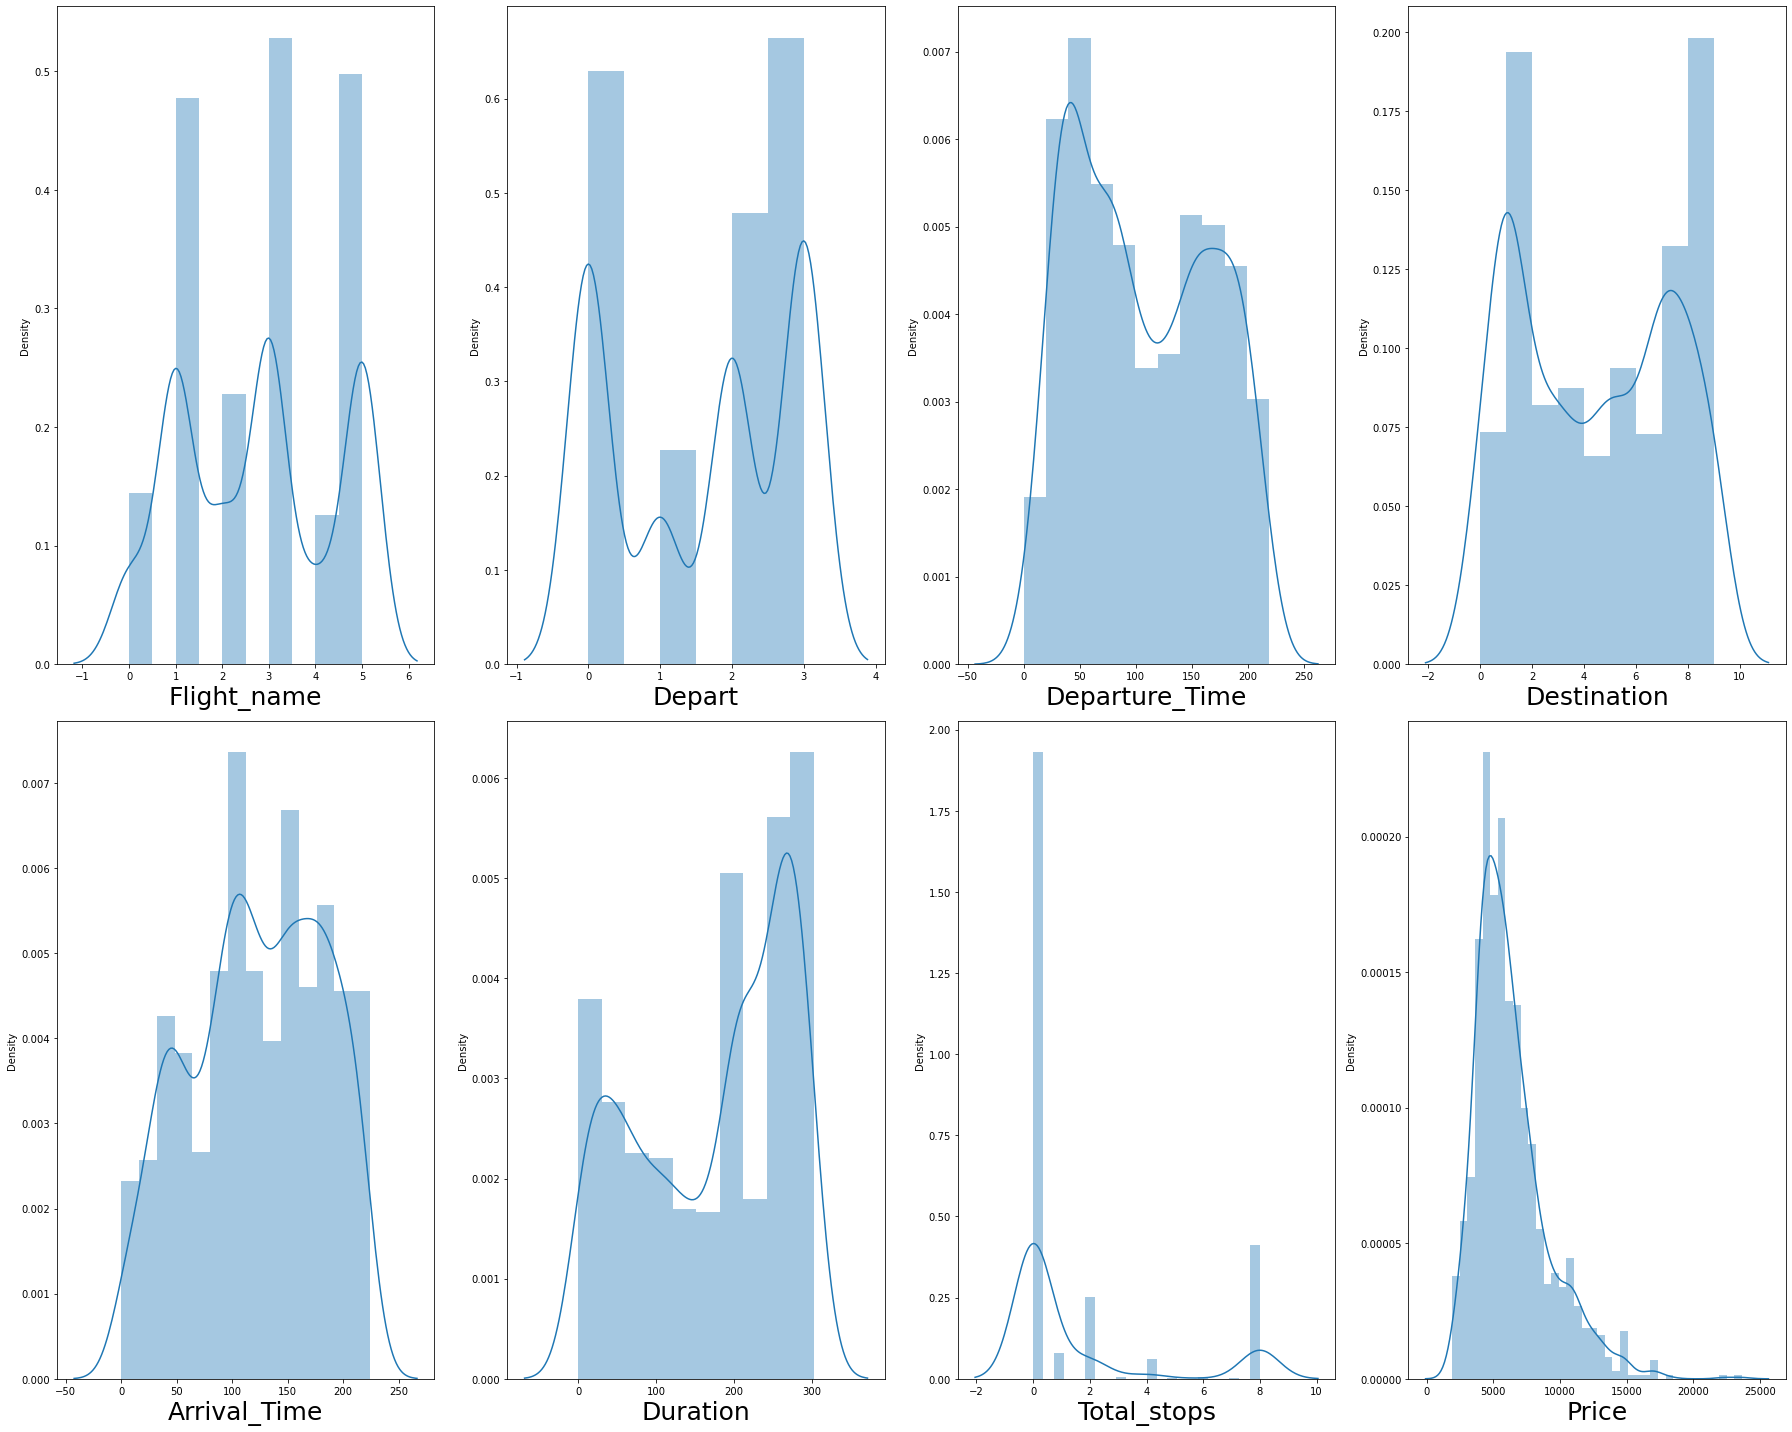

In [43]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

In [105]:
# The dataset is normally distributed as there is no skewness in the dataset.

### Replacing zero values from differnet columns

In [44]:
# Replacing continous columns with mean
df['Departure_Time']=df['Departure_Time'].replace(0,df['Departure_Time'].mean())
df['Arrival_Time']=df['Arrival_Time'].replace(0,df['Arrival_Time'].mean())
df['Duration']=df['Duration'].replace(0,df['Duration'].mean())

In [106]:
# There are few zero values that got replaced with the help of mean.

## Box Plot

Flight_name          AxesSubplot(0.125,0.536818;0.168478x0.343182)
Depart            AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Departure_Time    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Destination       AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Arrival_Time            AxesSubplot(0.125,0.125;0.168478x0.343182)
Duration             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Total_stops          AxesSubplot(0.529348,0.125;0.168478x0.343182)
Price                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

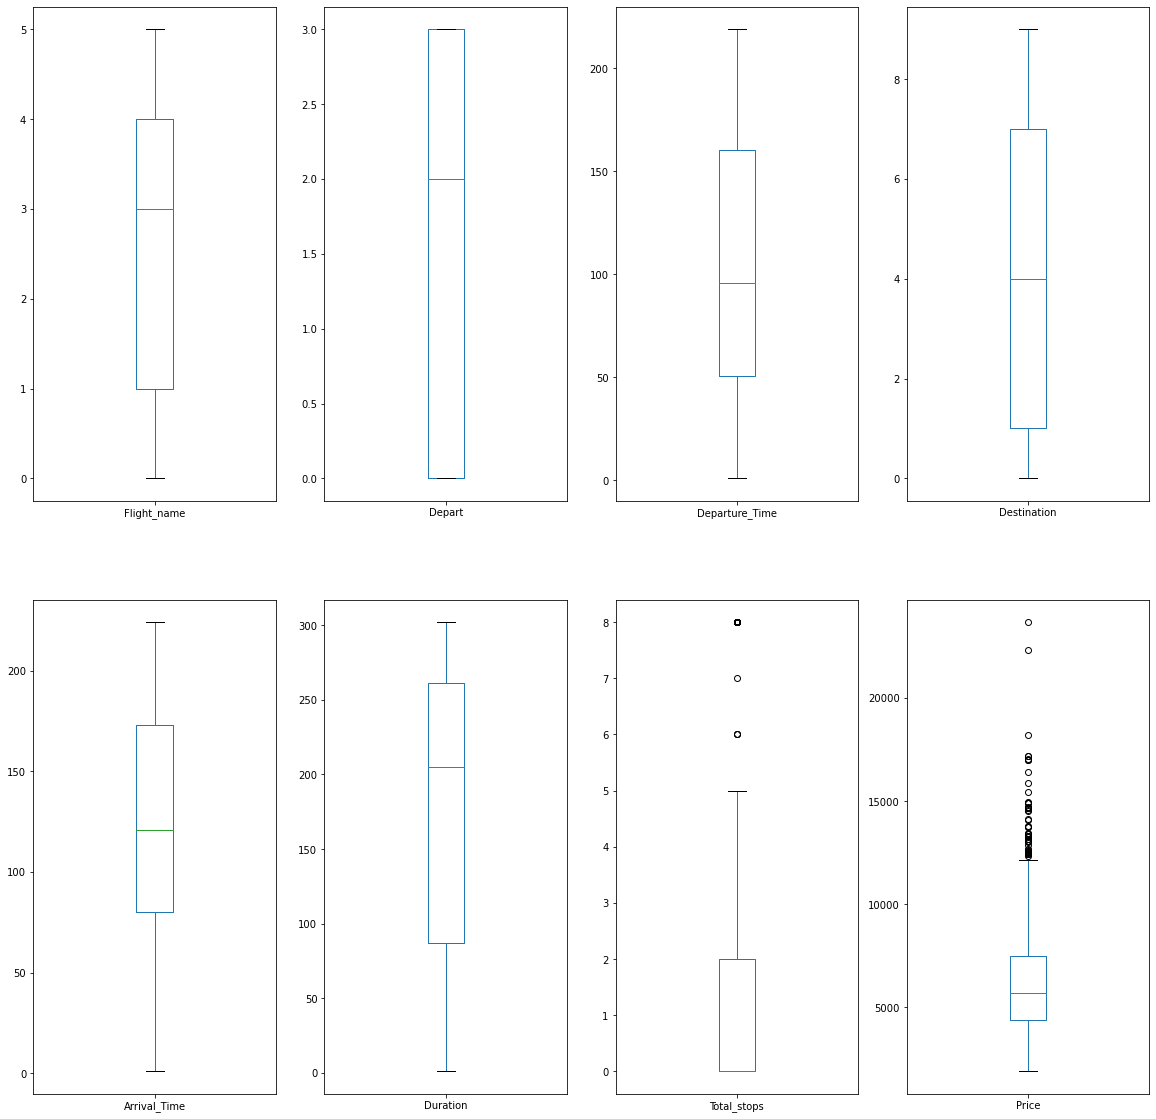

In [107]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(20,20))

In [108]:
# There are no outliers in the dataset.

## Visualize the correlation

In [47]:
df.drop('Price',axis=1).corrwith(df.Price)

Flight_name       0.140438
Depart           -0.141651
Departure_Time   -0.009117
Destination      -0.016628
Arrival_Time      0.085731
Duration         -0.050965
Total_stops      -0.319448
dtype: float64

## correlation

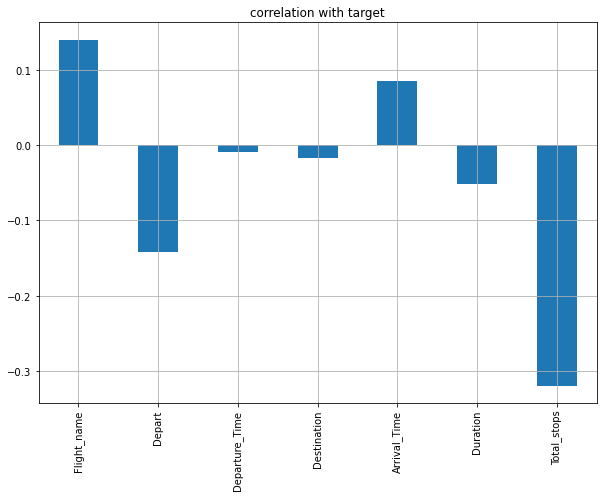

In [48]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

In [109]:
# The above plot gives me an clear idea that few columns are positively correlated and few are negatively correlated with label.
# However i will use all the columns for model prediction.

## Machine Learning

In [49]:
x = df.drop('Price',axis=1)
y = df.Price

In [112]:
# I have divided dataset into feature and label.

## StandardScaler

In [50]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.67141879,  1.13828063, -1.57233836, ..., -1.54271178,
         0.30071996,  2.26302128],
       [-0.4571241 ,  1.13828063, -1.09311968, ..., -1.0700766 ,
         0.30071996,  2.26302128],
       [ 0.15002324,  1.13828063, -1.04354534, ..., -1.01943712,
         0.30071996,  2.26302128],
       ...,
       [ 1.36431793, -0.47569004,  0.74113112, ..., -0.44552297,
        -0.79960891,  0.16470157],
       [ 1.36431793, -0.47569004, -0.48170275, ..., -1.10383626,
        -0.35947736,  0.16470157],
       [ 1.36431793, -0.47569004,  0.74113112, ...,  0.90486326,
         0.01777825,  0.16470157]])

In [111]:
# Standard scaler is basically scaling the date in one range so that it will be easy for Model building.

## VIF - variance inflation factor

In [51]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.017104,Flight_name
1,1.039108,Depart
2,1.049731,Departure_Time
3,1.027024,Destination
4,1.031894,Arrival_Time
5,1.032525,Duration
6,1.019838,Total_stops


In [110]:
# VIF is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# Multicollinearity is a phenomenon when two or more independent variables are highly intercorrelated.
# From the above stats i can say that none of the features are highly intercorrelated it means Multicollinearity doesn't exist.

## Model Building

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

In [113]:
# For model prediction i am dividing the dataset into 2 parts.
# One part is used for training purpose i.e 75% dataset.
# other part is used for testing purpose i.e 25% dataset.

## Linear Regression model

In [53]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [54]:
# adjusted r2 score
rg.score(x_train,y_train)

0.14706355029372165

In [55]:
rg.score(x_test,y_test)

0.11949209738011568

In [56]:
y_pred = rg.predict(x_test)
y_pred

array([3529.57500421, 7069.85813283, 6986.08924918, 6443.01477347,
       5630.19054029, 7062.9066522 , 7457.69203746, 6270.33571725,
       5436.29453016, 7447.40023519, 7609.90787591, 6959.25771574,
       6145.24072538, 7290.06806022, 3807.35574869, 6947.06936823,
       7262.39157445, 4369.60259254, 7139.03100957, 6852.66226128,
       6353.25478417, 6704.78676034, 6247.63570016, 7102.46469591,
       5949.20782159, 5143.38248292, 6786.38996188, 5821.11476736,
       6956.28313004, 5691.10643835, 6107.27300652, 6892.3904228 ,
       7465.40117215, 5701.3521286 , 6352.04764381, 6037.89171527,
       7223.62858268, 7202.28211001, 5716.30098096, 6318.51615596,
       6335.25352472, 6802.72173781, 6841.51237119, 3666.13058531,
       5297.5753309 , 7206.25033212, 6513.49849576, 6605.98998216,
       5715.02935791, 6261.15841498, 6610.23704521, 4050.27302899,
       7532.32998069, 5516.65957928, 5963.57951496, 4015.93228555,
       6326.70960538, 6430.86597158, 6449.49315813, 6064.47647

## Scatter Plot

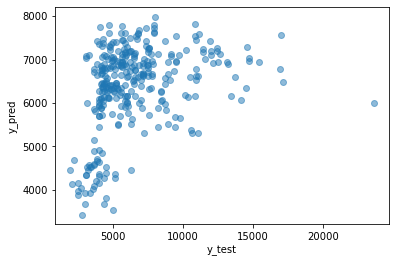

In [57]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [58]:
mean_squared_error(y_test,y_pred)

7956678.739333792

## RMSE

In [59]:
np.sqrt(mean_squared_error(y_test,y_pred))

2820.7585397076778

## r2 score

In [60]:
r2_score(y_test,y_pred)

0.11949209738011568

In [114]:
# Linear Regression accuracy score 11%

## DecisionTreeRegressor

In [61]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [62]:
dt.score(x_train,y_train)

0.9987444324558606

In [63]:
dt.score(x_test,y_test)

0.1243511924515116

In [64]:
y_pred = dt.predict(x_test)
y_pred

array([ 4500. ,  4294. ,  4996. ,  6354. ,  6311. ,  4683. ,  5717. ,
        4661. ,  5806. ,  5595. ,  5702. ,  7830. ,  6354. ,  5959. ,
        4932. ,  5614. ,  6258. ,  5141. ,  4919. ,  6483. ,  5345. ,
        7461. ,  4903. ,  6295. ,  3988. ,  3597. ,  3295. ,  5896. ,
        4405. ,  3994. ,  5975. , 11372. ,  7004. ,  9745. ,  4448. ,
        4180. ,  4788. ,  4788. , 12990. ,  3515. ,  5660. ,  4888. ,
        6339. ,  3435. ,  9745. ,  5934. ,  6803. ,  6266. ,  5168. ,
        7023. ,  6295. ,  3435. , 10883. ,  9021. ,  6857. ,  3211. ,
        4301. ,  7461. ,  9408. ,  6988. ,  9682. ,  5974. ,  5838. ,
        5974. ,  6793. , 14678. ,  4010. ,  4208. ,  4373. ,  6268. ,
        5217. ,  6545. ,  5063. ,  4746. ,  7142. ,  4226. ,  6295. ,
        5702. ,  4919. ,  4500. ,  5606. ,  3993. ,  3930. ,  5640. ,
        3211. ,  3999. ,  9611. ,  5838. ,  2019. ,  4303. , 10002. ,
        3294. ,  4718. , 17170. ,  7142. ,  6121. ,  9970. ,  9682. ,
       10129. ,  806

## Scatter Plot

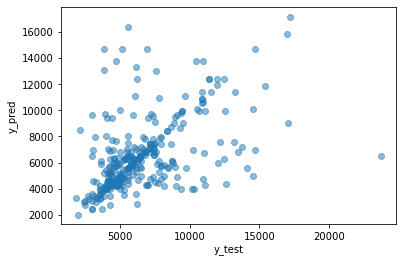

In [65]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [66]:
mean_squared_error(y_test,y_pred)

7912769.697368421

## RMSE

In [67]:
np.sqrt(mean_squared_error(y_test,y_pred))

2812.9645744958148

## r2 score

In [68]:
r2_score(y_test,y_pred)

0.1243511924515116

In [115]:
# Decision Tree Regression accuracy score 12%

## RandomForestRegressor

In [69]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [70]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9317795359603639

In [71]:
rf.score(x_test,y_test)

0.5554022967852575

In [72]:
y_pred = rf.predict(x_test)
y_pred

array([ 4782.52      ,  4744.79      ,  7205.95      ,  6367.3       ,
        7135.07      ,  5823.26      ,  5784.67      ,  5821.12      ,
        8403.81      ,  6912.06      ,  5258.17      ,  7073.83      ,
        6276.41      ,  6126.79      ,  5061.47      ,  5318.75      ,
        9237.82      ,  5102.94      ,  7481.47      ,  5986.91      ,
        5328.5       ,  7434.03      ,  6406.99      ,  5357.25      ,
        4246.77      ,  3874.02      ,  4593.99      ,  5918.        ,
        5450.62      ,  5226.96      ,  5333.58      , 11931.465     ,
        6804.37      ,  7674.4       ,  6200.93      ,  5811.69      ,
        5379.81      ,  6288.96      , 10469.5       ,  4668.2       ,
        5145.33      ,  5241.88      ,  5776.83      ,  3488.17      ,
        8087.5575    ,  9544.09      ,  7204.29333333,  5654.18      ,
        4224.89      ,  8854.59      ,  5840.9       ,  3386.62      ,
       10102.2       ,  7308.46      ,  7029.4       ,  2974.58      ,
      

## Scatter Plot

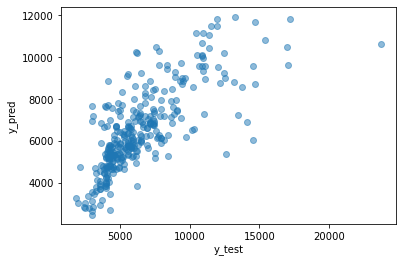

In [73]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [74]:
mean_squared_error(y_test,y_pred)

4017591.531205741

## RMSE

In [75]:
np.sqrt(mean_squared_error(y_test,y_pred))

2004.393058061652

## r2 score

In [76]:
r2_score(y_test,y_pred)

0.5554022967852575

In [116]:
# Random Forest Regression accuracy score 55%

## Hyperparameter Tuning in Random Forest Regressor Model

### Using RandomizedSearchCV method for improving the r2 score

In [85]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [86]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [87]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [88]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [89]:
prediction = rf_random.predict(x_test)

## Scatter Plot

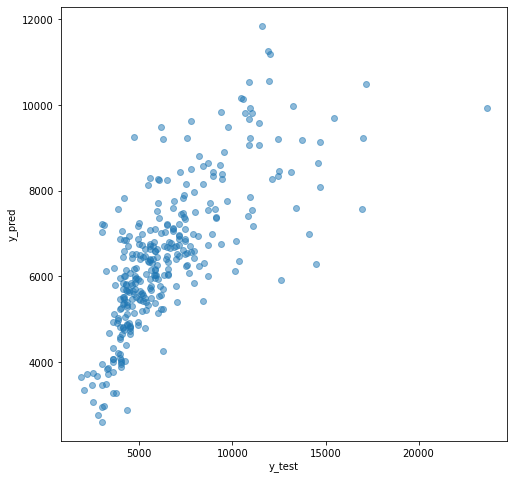

In [90]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [91]:
mean_squared_error(y_test,y_pred)

7482401.250526629

## RMSE

In [92]:
np.sqrt(mean_squared_error(y_test,y_pred))

2735.397823082893

## r2 score

In [93]:
r2_score(y_test,y_pred)

0.17197694572079236

In [118]:
# I have tried to improve the accuracy score by using hyper parameter tunning in random forest algorithm.
# Hyper parameter is reducing the accuracy score.

## AdaBoost Regressor Model

In [77]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [78]:
# adjusted r2 score
ada.score(x_train,y_train)

0.18713105690613063

In [79]:
ada.score(x_test,y_test)

0.17197694572079236

In [80]:
y_pred = ada.predict(x_test)
y_pred

array([5763.2       , 7018.29639175, 8269.21044776, 6944.79126214,
       8390.6122449 , 8271.63987138, 8269.21044776, 7643.39053254,
       8271.63987138, 8553.69310345, 8066.0625    , 8271.63987138,
       6944.79126214, 8066.0625    , 5209.46666667, 6944.79126214,
       8328.73271028, 5209.46666667, 7643.39053254, 6944.79126214,
       8328.73271028, 8271.63987138, 6419.9760479 , 8328.73271028,
       6675.49101796, 4590.66666667, 6675.49101796, 6784.16901408,
       8271.63987138, 6784.16901408, 6944.79126214, 9678.74612403,
       7148.19902913, 7950.3015873 , 6944.79126214, 7018.29639175,
       8328.73271028, 8328.73271028, 9415.06122449, 6944.79126214,
       8822.32653061, 7643.39053254, 8269.21044776, 5763.2       ,
       8013.75      , 9929.46111869, 9134.31481481, 6784.16901408,
       6675.49101796, 8822.32653061, 8417.16273585, 3633.93617021,
       8328.73271028, 9415.06122449, 6944.79126214, 3229.25490196,
       6675.49101796, 8328.73271028, 7148.42857143, 7018.29639

## Scatter Plot

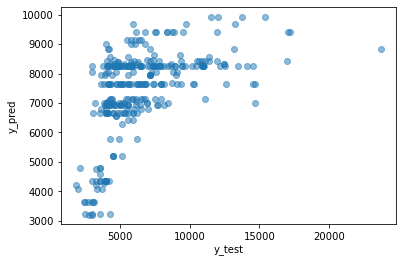

In [81]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [82]:
mean_squared_error(y_test,y_pred)

7482401.250526629

## RMSE

In [83]:
np.sqrt(mean_squared_error(y_test,y_pred))

2735.397823082893

## r2 score

In [84]:
r2_score(y_test,y_pred)

0.17197694572079236

In [117]:
# AdaBoost Regression accuracy score 17%

## Regularization

In [119]:
# lasso regularization
lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [120]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [121]:
# best alphas parameters
alpha = lasscv.alpha_
alpha

1.4374302493910474

In [122]:
# now we have best parameter lets use the lasso regularization
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.4374302493910474)

In [123]:
lasso_reg.score(x_test,y_test)

0.11940278317806119

In [124]:
# I have used lasso for increasing accuracy score for linear regression but it is neither improving nor reducing the score.

## Saving the Best Model

In [125]:
import pickle

In [126]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))

In [127]:
# The best model is Random Forest classifier whose accuracy score is 55%.